In [84]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

def plot_feature_month(data_df1, data_df2, feature, month):
    """
    根據選擇的月份過濾資料並繪製兩個資料集中特定特徵（如 Avg_Power(mW)）的隨時間變化圖表。
    優先顯示 df_1 的資料，當 df_1 有資料缺失時，顯示 df_2 的預測資料補足缺失部分。
    
    參數:
    data_df1 (DataFrame): 第一個資料集，包含時間和其他指標（實際資料）。
    data_df2 (DataFrame): 第二個資料集，包含時間和其他指標（預測資料）。
    feature (str): 欲繪製的特徵名稱，例如 'Avg_Power(mW)'。
    month (int): 需要篩選的月份 (1 至 12)
    """
    # 確保 DateTime 列是 datetime 類型
    data_df1['DateTime'] = pd.to_datetime(data_df1['DateTime'])
    data_df2['DateTime'] = pd.to_datetime(data_df2['DateTime'])
    
    # 篩選特定月份的資料
    filtered_df1 = data_df1[data_df1['Month'] == month]
    filtered_df2 = data_df2[data_df2['Month'] == month]
    
    # 將 DateTime 設為索引，便於對齊
    filtered_df1.set_index('DateTime', inplace=True)
    filtered_df2.set_index('DateTime', inplace=True)
    
    # 以 union 合併兩個資料集的時間範圍
    combined_df = filtered_df1[[feature]].combine_first(filtered_df2[[feature]])
    
    # 繪製圖表
    plt.figure(figsize=(12, 6))
    
    # 顯示 df_1 的資料（實線）
    plt.plot(filtered_df1.index, filtered_df1[feature], label=f'{feature} in {month} (DataSet1)', color='b', linestyle='-', linewidth=2)
    
    # 顯示 df_2 的資料（如果 df_1 沒有資料，則顯示 df_2 的資料，虛線）
    plt.plot(combined_df.index, combined_df[feature], label=f'{feature} in {month} (Predicted DataSet2)', color='g', linestyle='--', linewidth=2)
    
    # 設定圖表標題和標籤
    plt.xlabel('DateTime')
    plt.ylabel(feature)
    plt.title(f'{feature} Comparison in {month}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
def plot_feature_date_range(data_df1, data_df2, feature, start_date, end_date):
    """
    根據選擇的日期範圍過濾資料並繪製兩個資料集中特定特徵（如 Avg_Power(mW)）的隨時間變化圖表。
    優先顯示 df_1 的資料，當 df_1 有資料缺失時，顯示 df_2 的預測資料補足缺失部分。
    
    參數:
    data_df1 (DataFrame): 第一個資料集，包含時間和其他指標（實際資料）。
    data_df2 (DataFrame): 第二個資料集，包含時間和其他指標（預測資料）。
    feature (str): 欲繪製的特徵名稱，例如 'Avg_Power(mW)'。
    start_date (str): 起始日期，格式為 'YYYY-MM-DD'。
    end_date (str): 結束日期，格式為 'YYYY-MM-DD'。
    """
    # 確保 DateTime 列是 datetime 類型
    data_df1['DateTime'] = pd.to_datetime(data_df1['DateTime'])
    data_df2['DateTime'] = pd.to_datetime(data_df2['DateTime'])
    
    # 篩選指定日期範圍內的資料
    filtered_df1 = data_df1[(data_df1['DateTime'] >= start_date) & (data_df1['DateTime'] <= end_date)]
    filtered_df2 = data_df2[(data_df2['DateTime'] >= start_date) & (data_df2['DateTime'] <= end_date)]
    
    # 將 DateTime 設為索引，便於對齊
    filtered_df1.set_index('DateTime', inplace=True)
    filtered_df2.set_index('DateTime', inplace=True)
    
    # 以 union 合併兩個資料集的時間範圍
    combined_df = filtered_df1[[feature]].combine_first(filtered_df2[[feature]])
    
    # 繪製圖表
    plt.figure(figsize=(12, 6))
    
    # 顯示 df_1 的資料（實線）
    plt.plot(filtered_df1.index, filtered_df1[feature], label=f'{feature} from {start_date} to {end_date} (DataSet1)', color='b', linestyle='-', linewidth=2)
    
    # 顯示 df_2 的資料（如果 df_1 沒有資料，則顯示 df_2 的資料，虛線）
    plt.plot(combined_df.index, combined_df[feature], label=f'{feature} from {start_date} to {end_date} (Predicted DataSet2)', color='g', linestyle='--', linewidth=2)
    
    # 設定圖表標題和標籤
    plt.xlabel('DateTime')
    plt.ylabel(feature)
    plt.title(f'{feature} from {start_date} to {end_date}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
def SeqNumber2Datetime(seq_number: int) -> datetime:
    seq_number = str(seq_number)
    datetime_str = seq_number[:12]
    return datetime.strptime(datetime_str, "%Y%m%d%H%M") 

In [82]:
device = 'L8'
MergedSorted_df = pd.read_csv(f'..//Data//MergedSorted//{device}_Merged_Sorted.csv')
PredictedOverAllData_df = pd.read_csv(f'..//Data//PredictedOverAllData//Predicted_OverAll_{device}.csv')

PredictedOverAllData_df['DateTime'] = PredictedOverAllData_df['SeqNumber'].apply(SeqNumber2Datetime)
PredictedOverAllData_df['Year'] = PredictedOverAllData_df['DateTime'].dt.year
PredictedOverAllData_df['Month'] = PredictedOverAllData_df['DateTime'].dt.month
PredictedOverAllData_df['Day'] = PredictedOverAllData_df['DateTime'].dt.day
PredictedOverAllData_df['Hour'] = PredictedOverAllData_df['DateTime'].dt.hour
PredictedOverAllData_df['Minute'] = PredictedOverAllData_df['DateTime'].dt.minute

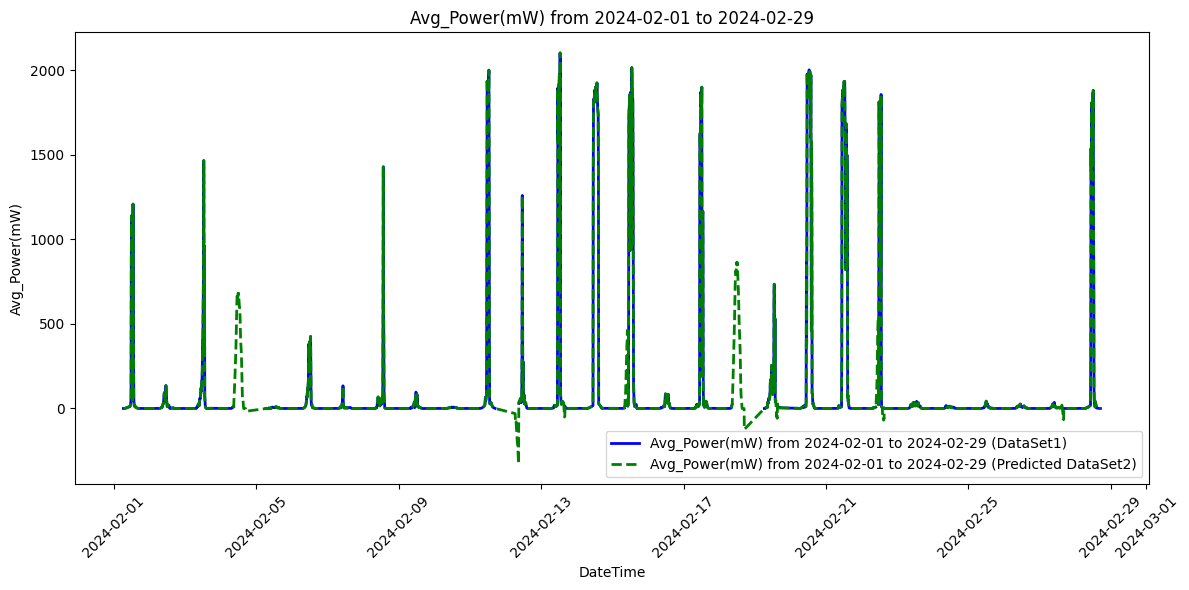

In [89]:
plot_feature_date_range(MergedSorted_df, PredictedOverAllData_df,'Avg_Power(mW)','2024-02-01', '2024-02-29')